question 1  Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).



In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer


file_path="/content/ 20230409_playback_data_for_upload(1).xlsx"
df=pd.read_excel(file_path)

features=df.drop(columns=["Date","Time","Subject","Caller","Comments","Treatment"],errors='ignore')

#coverting all coluns to numeric
features=features.apply(pd.to_numeric,errors='coerce')

print(df.isnull().sum())


#handlijng missing values
features.fillna(features.mean(),inplace=True)

#extract target column and align with features
target=df.loc[features.index,"Order60"]
#convert features to numpy array
x=features.values
y=target.values

#convert y to pandas series for proper indexing
y_series=pd.Series(y)

def split_train_test(x,y,test_size=0.3):
    unique_classes=np.unique(y)

    if len(unique_classes)>2:
        y_filtered=np.isin(y,unique_classes[:2])
        x=x[y_filtered]
        y=y[y_filtered]

    X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=test_size, random_state=42)

    print(f"train set size : {len(X_train)}, test set size : {len(X_test)}")
    return X_train,X_test,y_train,y_test

X_train, X_test,y_train,y_test=split_train_test(x,y)
def train_knn_classifier(X_train, y_train, k=3):

    imputer = SimpleImputer(strategy="mean")
    X_train = imputer.fit_transform(X_train)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    return knn, imputer  # Return trained model and imputer

# Train the kNN model with missing value handling
knn_model, imputer = train_knn_classifier(X_train, y_train)

# Function to compute confusion matrix and derive performance metrics
def evaluate_confusion_matrix(knn_model, X_test, y_test, imputer):
    X_test_imputed = imputer.transform(X_test)
    y_pred = knn_model.predict(X_test_imputed)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Check if model is underfitting, well-fitted, or overfitting
    if precision < 0.6 and recall < 0.6:
        print("Model might be **underfitting** (poor performance on both training and test data).")
    elif precision > 0.9 and recall > 0.9 and abs(precision - recall) < 0.05:
        print("Model is **overfitting** (too perfect on training but may fail on unseen data).")
    else:
        print("Model seems **well-fitted**.")

evaluate_confusion_matrix(knn_model, X_test, y_test, imputer)

Date                            0
Time                            0
Subject                         0
Caller                          0
Relationship_Caller_OgRecvr     0
CallerDirecKnown                0
Dist2Caller                    15
Dist2AltRecvr                  14
Treatment                       0
TimeSetUp                       0
Order60                         0
Order300                        0
Distance                        0
dBC_at_ele                      0
dBC                             0
dBZ                             0
SpeakerLoc                      0
OtherAdults                     0
NoiseBursts                     0
Playback                        0
LatVoc                          0
VocCen                          0
LatVig                          0
VigCen                          0
LatApr                          0
AprCen                          0
NumVocPre                       1
NumVocPost                      0
DurVigPre                       0
DurVigPost    

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 0 11]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 0 11]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


question 2. Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02.
Analyse the results.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score

file_path="/content/Lab Session Data.xlsx"
df=pd.read_excel(file_path,sheet_name =1)

#convert volume column to jumeric format )
def convert_volume(value):
  if isinstance(value,str):
    if 'M' in value:
      return float(value.replace('M',''))*1e6
    elif 'K' in value:
      return float(value.replace('K',''))*1e3
  return float(value)

df["Volume"]=df["Volume"].apply(convert_volume)

#defining features and traget variable
features=["Open","High","Low","Volume"]
target="Price"
X=df[features]
y=df[target]

#split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#train linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

#predict prices
y_pred=model.predict(X_test)

#calcumating evaluation merics
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test,y_pred)
r2=r2_score(y_test, y_pred)

print(f"mean squared error is {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3%}")
print(f"R² Score: {r2:.4f}")







mean squared error is 180.72
Root Mean Squared Error (RMSE): 13.44
Mean Absolute Percentage Error (MAPE): 0.519%
R² Score: 0.9973


question 3
 Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.



Class labels assigned to the data points (0: Blue, 1: Red):
[1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0]


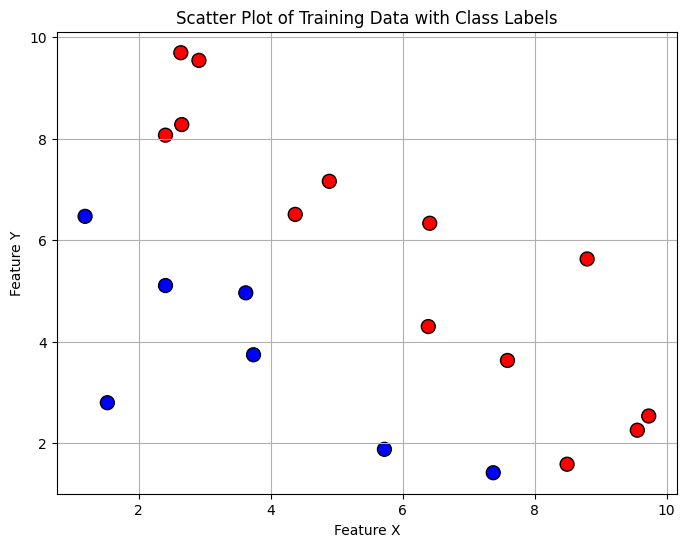

Observation: The scatter plot shows that points with a combined feature value (X+Y) less than 10 are colored blue (Class 0),
while points with a combined value equal to or greater than 10 are colored red (Class 1).


In [1]:
import numpy as np  # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

def generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42):  # Define a function to generate random data using camelCase naming
    np.random.seed(seed)  # Set the random seed for reproducibility
    featureX = np.random.uniform(lowerBound, upperBound, numPoints)  # Generate numPoints random numbers for feature X between lowerBound and upperBound
    featureY = np.random.uniform(lowerBound, upperBound, numPoints)  # Generate numPoints random numbers for feature Y between lowerBound and upperBound
    return featureX, featureY  # Return the generated feature arrays

def assignClasses(featureX, featureY, threshold=10):  # Define a function to assign classes based on the sum of featureX and featureY using camelCase naming
    classLabels = (featureX + featureY >= threshold).astype(int)  # Compute the sum of featureX and featureY, assign 1 if >= threshold, else assign 0
    return classLabels  # Return the array of class labels

def plotData(featureX, featureY, classLabels):  # Define a function to plot the data with colors based on class labels using camelCase naming
    colors = np.where(classLabels == 0, 'blue', 'red')  # Map class labels to colors: blue for 0, red for 1
    plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
    plt.scatter(featureX, featureY, c=colors, edgecolors='k', s=100)  # Plot the data points with corresponding colors and a black edge color
    plt.xlabel("Feature X")  # Label the x-axis
    plt.ylabel("Feature Y")  # Label the y-axis
    plt.title("Scatter Plot of Training Data with Class Labels")  # Set the title of the plot
    plt.grid(True)  # Enable grid lines on the plot
    plt.show()  # Display the plot

if __name__ == "__main__":  # Main program: Check if the script is executed directly
    xValues, yValues = generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42)  # Generate random data for feature X and Y
    labels = assignClasses(xValues, yValues, threshold=10)  # Assign class labels based on the sum of feature values
    print("Class labels assigned to the data points (0: Blue, 1: Red):")  # Inform the user about the class labels
    print(labels)  # Print the array of class labels
    plotData(xValues, yValues, labels)  # Plot the data using the assigned class labels
    # Print an observation about the plot
    print("Observation: The scatter plot shows that points with a combined feature value (X+Y) less than 10 are colored blue (Class 0),")
    print("while points with a combined value equal to or greater than 10 are colored red (Class 1).")


question 4  Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
This creates a test set of about 10,000 points. Classify these points with above training data using
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
and class boundary lines in the feature space

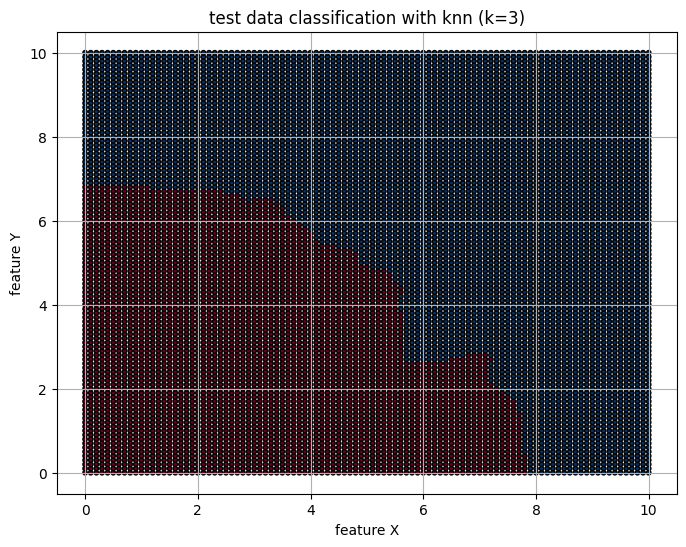

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generateRandomData(numPoints=20, lowerBound=1,upperBound=10,seed=42):
  np.random.seed(seed)
  featureX = np.random.uniform(lowerBound, upperBound, numPoints)  # Generate random values for feature X
  featureY = np.random.uniform(lowerBound, upperBound, numPoints)  # Generate random values for feature Y
  return featureX, featureY  # Return the generated features


def assignClasses(featureX, featureY, threshold=10):  # Define function to assign class labels based on sum of features
    classLabels = (featureX + featureY >= threshold).astype(int)  # Assign class 1 if sum >= threshold, else class 0
    return classLabels  # Return the class labels

def generateTestData(lowerBound=0, upperBound=10, step=0.1):  # Define function to generate test data grid
    xRange = np.arange(lowerBound, upperBound + step, step)  # Create array of x values from lowerBound to upperBound
    yRange = np.arange(lowerBound, upperBound + step, step)  # Create array of y values from lowerBound to upperBound
    xx, yy = np.meshgrid(xRange, yRange)  # Create mesh grid for x and y values
    testPoints = np.c_[xx.ravel(), yy.ravel()]  # Combine grid arrays into 2D array of test points
    return xx, yy, testPoints  # Return the mesh grid (for plotting) and test points

def classifyTestData(trainFeatures, trainLabels, testPoints, k=3):  # Define function to classify test data using kNN
    knnClassifier = KNeighborsClassifier(n_neighbors=k)  # Create a kNN classifier with specified k neighbors
    knnClassifier.fit(trainFeatures, trainLabels)  # Fit the classifier using the training data
    predictedLabels = knnClassifier.predict(testPoints)  # Predict class labels for the test data
    return predictedLabels  # Return the predicted class labels
def plotTestResults(xx,yy,predictedLabels):
  plt.figure(figsize=(8,6))
  plt.scatter(xx.ravel(),yy.ravel(),c=predictedLabels, cmap=plt.cm.RdBu,edgecolor='k',s=10)
  plt.xlabel("feature X")
  plt.ylabel("feature Y")
  plt.title("test data classification with knn (k=3)")
  plt.grid(True)
  plt.show()

if __name__=="__main__":
  trainX,trainY=generateRandomData()
  trainLabels= assignClasses(trainX,trainY)
  trainFeatures=np.c_[trainX,trainY]

  xx,yy,testPoints=generateTestData()
  predictedLabels=classifyTestData(trainFeatures,trainLabels,testPoints,k=3)
  plotTestResults(xx,yy,predictedLabels)






question 5 Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

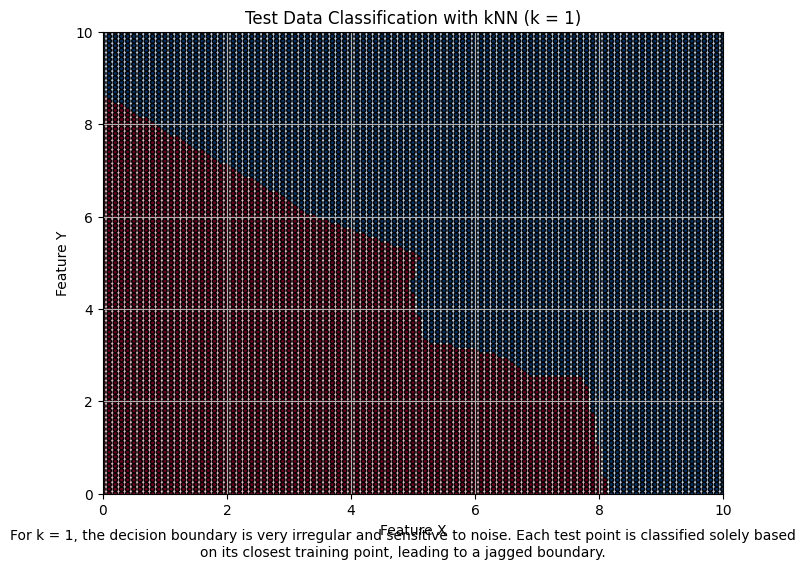

Observation for k = 1:
For k = 1, the decision boundary is very irregular and sensitive to noise. Each test point is classified solely based on its closest training point, leading to a jagged boundary.
--------------------------------------------------------------------------------


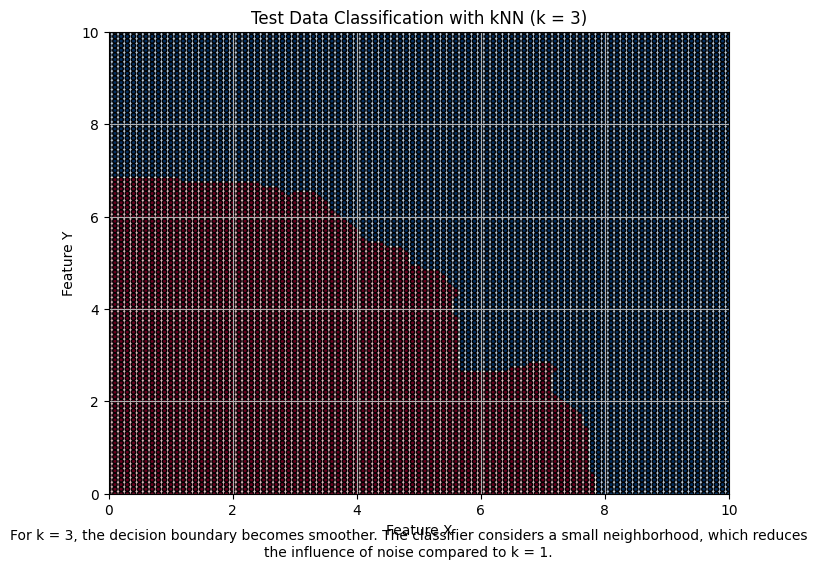

Observation for k = 3:
For k = 3, the decision boundary becomes smoother. The classifier considers a small neighborhood, which reduces the influence of noise compared to k = 1.
--------------------------------------------------------------------------------


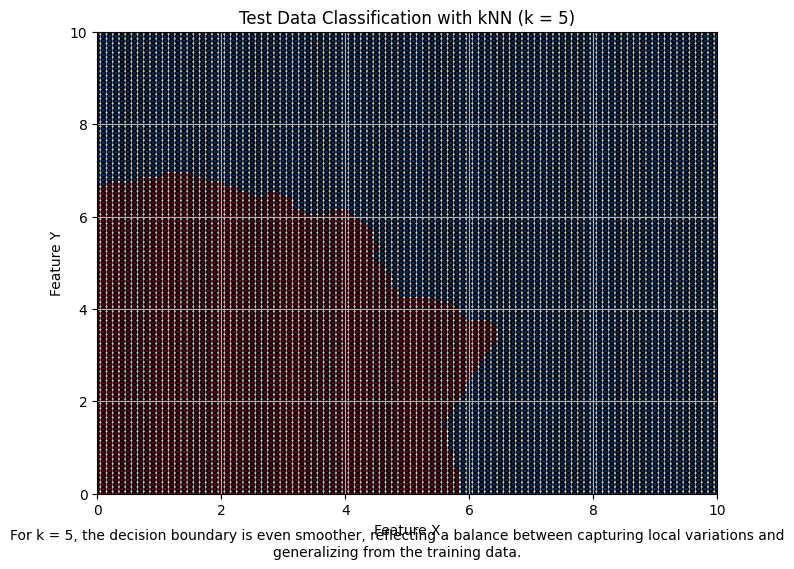

Observation for k = 5:
For k = 5, the decision boundary is even smoother, reflecting a balance between capturing local variations and generalizing from the training data.
--------------------------------------------------------------------------------


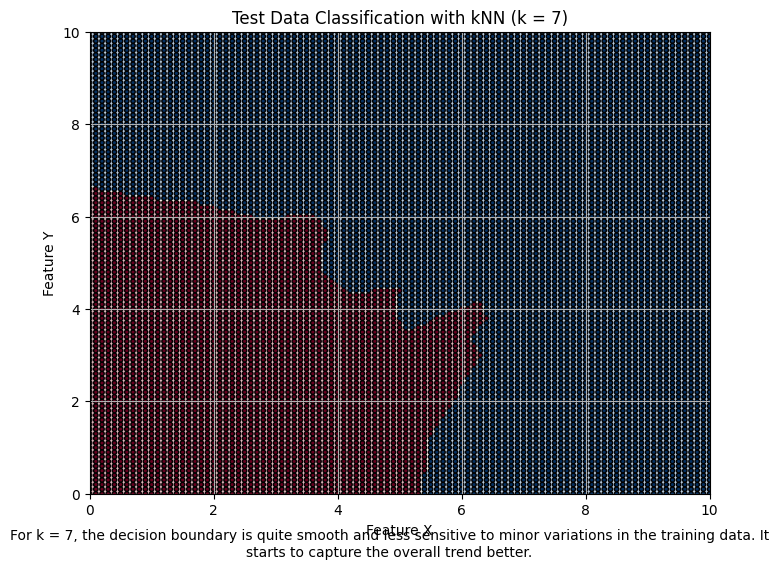

Observation for k = 7:
For k = 7, the decision boundary is quite smooth and less sensitive to minor variations in the training data. It starts to capture the overall trend better.
--------------------------------------------------------------------------------


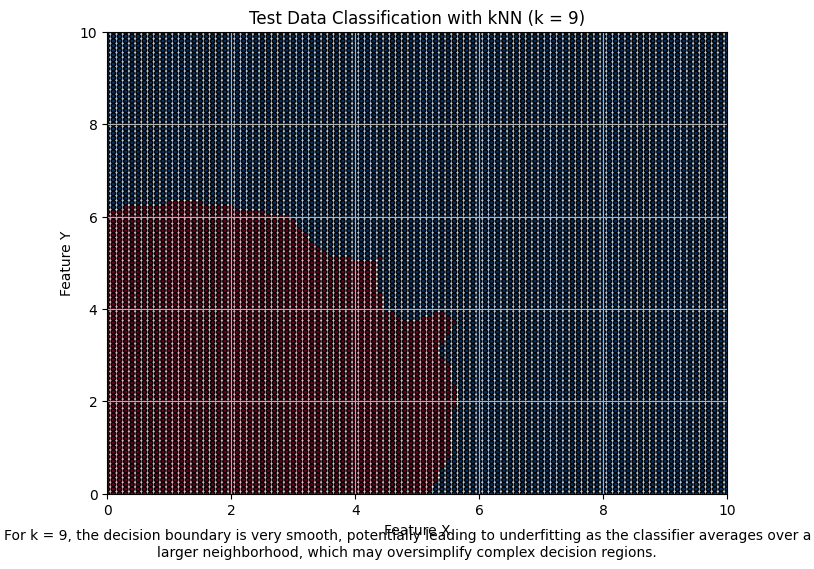

Observation for k = 9:
For k = 9, the decision boundary is very smooth, potentially leading to underfitting as the classifier averages over a larger neighborhood, which may oversimplify complex decision regions.
--------------------------------------------------------------------------------


In [2]:
import numpy as np  # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from sklearn.neighbors import KNeighborsClassifier  # Import kNN classifier from scikit-learn

def generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42):  # Define function to generate random training data
    np.random.seed(seed)  # Set random seed for reproducibility
    featureX = np.random.uniform(lowerBound, upperBound, numPoints)  # Generate random values for feature X
    featureY = np.random.uniform(lowerBound, upperBound, numPoints)  # Generate random values for feature Y
    return featureX, featureY  # Return the generated features

def assignClasses(featureX, featureY, threshold=10):  # Define function to assign class labels based on sum of features
    classLabels = (featureX + featureY >= threshold).astype(int)  # Assign class 1 if sum >= threshold, else class 0
    return classLabels  # Return the class labels

def generateTestData(lowerBound=0, upperBound=10, step=0.1):  # Define function to generate test data grid
    xRange = np.arange(lowerBound, upperBound + step, step)  # Create array of x values from lowerBound to upperBound
    yRange = np.arange(lowerBound, upperBound + step, step)  # Create array of y values from lowerBound to upperBound
    xx, yy = np.meshgrid(xRange, yRange)  # Create mesh grid for x and y values
    testPoints = np.c_[xx.ravel(), yy.ravel()]  # Combine grid arrays into 2D array of test points
    return xx, yy, testPoints  # Return the mesh grid (for plotting) and test points

def classifyTestData(trainFeatures, trainLabels, testPoints, k=3):  # Define function to classify test data using kNN
    knnClassifier = KNeighborsClassifier(n_neighbors=k)  # Create a kNN classifier with specified k neighbors
    knnClassifier.fit(trainFeatures, trainLabels)  # Fit the classifier using the training data
    predictedLabels = knnClassifier.predict(testPoints)  # Predict class labels for the test data
    return predictedLabels  # Return the predicted class labels

def plotTestResults(xx, yy, predictedLabels, k, observationText):  # Define function to plot classified test data with annotation
    predictedGrid = predictedLabels.reshape(xx.shape)  # Reshape flat predictions to the grid shape for contour plotting
    plt.figure(figsize=(8, 6))  # Create a new figure with specified size
    # Plot decision boundaries using filled contours with transparency (alpha)
    contour = plt.contourf(xx, yy, predictedGrid, alpha=0.3, cmap=plt.cm.RdBu)
    # Overlay scatter plot of test points with predicted classes (using same colormap)
    plt.scatter(xx.ravel(), yy.ravel(), c=predictedLabels, cmap=plt.cm.RdBu, edgecolor='k', s=10)
    plt.xlabel("Feature X")  # Label the x-axis
    plt.ylabel("Feature Y")  # Label the y-axis
    plt.title(f"Test Data Classification with kNN (k = {k})")  # Set the title including the current k value
    plt.grid(True)  # Enable grid lines
    # Annotate the plot with observation text at the bottom of the figure
    plt.figtext(0.5, 0.01, observationText, wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()  # Display the plot

if __name__ == "__main__":  # Main program execution starts here
    # Generate training data
    trainX, trainY = generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42)  # Generate random training data for features
    trainLabels = assignClasses(trainX, trainY, threshold=10)  # Assign class labels based on the sum of features
    trainFeatures = np.c_[trainX, trainY]  # Stack features into a 2D array for kNN training

    # Generate test data grid (approximately 10,000 points)
    xx, yy, testPoints = generateTestData(lowerBound=0, upperBound=10, step=0.1)  # Generate the grid of test data points

    # Define various k values to explore the effect on decision boundaries
    kValues = [1, 3, 5, 7, 9]  # List of different k values to test

    # Define observation text for each k value in a dictionary
    observationDict = {
        1: "For k = 1, the decision boundary is very irregular and sensitive to noise. Each test point is classified solely based on its closest training point, leading to a jagged boundary.",
        3: "For k = 3, the decision boundary becomes smoother. The classifier considers a small neighborhood, which reduces the influence of noise compared to k = 1.",
        5: "For k = 5, the decision boundary is even smoother, reflecting a balance between capturing local variations and generalizing from the training data.",
        7: "For k = 7, the decision boundary is quite smooth and less sensitive to minor variations in the training data. It starts to capture the overall trend better.",
        9: "For k = 9, the decision boundary is very smooth, potentially leading to underfitting as the classifier averages over a larger neighborhood, which may oversimplify complex decision regions."
    }

    # Loop over each k value, classify the test data, and plot the results with corresponding observations
    for k in kValues:  # Iterate through the list of k values
        predictedLabels = classifyTestData(trainFeatures, trainLabels, testPoints, k=k)  # Classify test data using current k value
        # Retrieve the observation text for the current k value from the dictionary
        observationText = observationDict.get(k, "No observation available for this k value.")
        plotTestResults(xx, yy, predictedLabels, k, observationText)  # Plot the results and annotate with the observation
        # Print the observation to the console for clarity
        print(f"Observation for k = {k}:")  # Indicate which k value's observation is being printed
        print(observationText)  # Print the detailed observation text
        print("-" * 80)  # Print a separator line for readability between outputs


question 6  Repeat the exercises A3 to A5 for your project data considering any two features and classes.

In [5]:
import numpy as np                # For numerical operations
import pandas as pd               # For reading Excel files
import matplotlib.pyplot as plt   # For plotting
from sklearn.neighbors import KNeighborsClassifier  # For kNN classification

# ===================== Synthetic Data (A3-A5) =====================

def generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42):
    # Set the random seed for reproducibility
    np.random.seed(seed)
    # Generate numPoints random values for X and Y between lowerBound and upperBound
    X = np.random.uniform(lowerBound, upperBound, numPoints)
    Y = np.random.uniform(lowerBound, upperBound, numPoints)
    return X, Y

def assignClasses(X, Y, threshold=10):
    # Simple rule: if (X+Y) is greater than or equal to threshold, assign class 1 (Red), else 0 (Blue)
    classes = (X + Y >= threshold).astype(int)
    return classes

def plotSyntheticTrainingData(X, Y, classes):
    # Map class 0 to blue and class 1 to red
    colors = np.where(classes == 0, 'blue', 'red')
    plt.figure(figsize=(8,6))
    plt.scatter(X, Y, c=colors, edgecolors='k', s=100)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("Synthetic Training Data (A3)")
    plt.grid(True)
    plt.show()

def generateTestData(lowerBound=0, upperBound=10, step=0.1):
    # Generate a grid of test data points using arange (synthetic grid)
    xRange = np.arange(lowerBound, upperBound + step, step)
    yRange = np.arange(lowerBound, upperBound + step, step)
    xx, yy = np.meshgrid(xRange, yRange)
    testPoints = np.c_[xx.ravel(), yy.ravel()]
    return xx, yy, testPoints

def classifyTestData(trainFeatures, trainLabels, testPoints, k=3):
    # Initialize and train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trainFeatures, trainLabels)
    # Predict the class for each test point
    predicted = knn.predict(testPoints)
    return predicted

def plotSyntheticTestResults(xx, yy, predictedLabels, k):
    # Reshape the predictions to match the grid shape
    predictedGrid = predictedLabels.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    # Plot decision boundaries using a filled contour plot
    plt.contourf(xx, yy, predictedGrid, alpha=0.3, cmap=plt.cm.RdBu)
    # Overlay the grid points colored by their predicted class
    plt.scatter(xx.ravel(), yy.ravel(), c=predictedLabels, cmap=plt.cm.RdBu, edgecolor='k', s=10)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"Synthetic Test Data Classification with kNN (k = {k}) (A4)")
    plt.grid(True)
    plt.show()

# ===================== Project Data (A6) =====================

def loadProjectData(filePath, sheetName):
    # Load the project data from the specified Excel file and sheet
    df = pd.read_excel(filePath, sheet_name=sheetName)
    return df

def prepareProjectData(df, featureCols, classSourceCol):
    """
    Extract two features and generate a class label.
    Here, we use the two feature columns (e.g., "LatVig" and "NumVocPre")
    and generate the class label based on the classSourceCol (e.g., "DurVigPost")
    by comparing each value with the median.
    """
    # Drop rows with missing values in the relevant columns
    df_clean = df[featureCols + [classSourceCol]].dropna()

    feature1 = df_clean[featureCols[0]].values
    feature2 = df_clean[featureCols[1]].values
    # Compute the median of the source column to use as a threshold
    threshold = np.median(df_clean[classSourceCol].values)
    # Assign class 1 if the source column's value is >= threshold; otherwise, class 0
    classes = (df_clean[classSourceCol].values >= threshold).astype(int)
    return feature1, feature2, classes

def plotProjectTrainingData(feature1, feature2, classes, featureCols, classSourceCol):
    colors = np.where(classes == 0, 'blue', 'red')
    plt.figure(figsize=(8,6))
    plt.scatter(feature1, feature2, c=colors, edgecolors='k', s=100)
    plt.xlabel(featureCols[0])
    plt.ylabel(featureCols[1])
    plt.title(f"Project Training Data using '{classSourceCol}' for Class (A6)")
    plt.grid(True)
    plt.show()

def plotProjectTestResults(xx, yy, predictedLabels, k, featureCols):
    predictedGrid = predictedLabels.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, predictedGrid, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(xx.ravel(), yy.ravel(), c=predictedLabels, cmap=plt.cm.RdBu, edgecolor='k', s=10)
    plt.xlabel(featureCols[0])
    plt.ylabel(featureCols[1])
    plt.title(f"Project Test Data Classification with kNN (k = {k}) (A6)")
    plt.grid(True)
    plt.show()

# ===================== Main Program =====================

if __name__ == "__main__":
    # ----------- Synthetic Data: Exercises A3-A5 -----------
    print("=== Synthetic Data (A3-A5) ===")
    # A3: Generate 20 random training data points
    synX, synY = generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42)
    # Assign classes based on the rule (if X+Y >= 10 -> Class 1, else 0)
    synClasses = assignClasses(synX, synY, threshold=10)
    # Plot the synthetic training data
    plotSyntheticTrainingData(synX, synY, synClasses)

    # Prepare training features for kNN (stacking X and Y)
    synTrainFeatures = np.c_[synX, synY]

    # A4: Generate test data (grid from 0 to 10 in increments of 0.1)
    xx, yy, synTestPoints = generateTestData(lowerBound=0, upperBound=10, step=0.1)

    # Define observations for synthetic data for different k values
    syntheticObservations = {
        3: "For k=3: The decision boundary is moderately smooth, capturing local variations.",
        5: "For k=5: The decision boundary is smoother, balancing local and global trends.",
        7: "For k=7: The decision boundary becomes very smooth and generalized."
    }

    # Classify the synthetic test data using kNN for different k values, plot results, and print observations
    for k in [3, 5, 7]:
        predictedSyn = classifyTestData(synTrainFeatures, synClasses, synTestPoints, k=k)
        plotSyntheticTestResults(xx, yy, predictedSyn, k)
        print(f"Observation for synthetic data with k = {k}:")
        print(syntheticObservations.get(k, "No observation available for this k value."))
        print("-" * 80)

    # ----------- Project Data: Exercise A6 -----------
    print("=== Project Data (A6) ===")
    # Specify the file path and sheet name for your project Excel file
    projectFilePath = "/content/ 20230409_playback_data_for_upload(1).xlsx"
    projectSheetName = "20230409_playback_data_for_uplo"  # Update if needed

    # Load the project data
    projectDF = loadProjectData(projectFilePath, projectSheetName)

    # For this example, choose two features and generate classes.
    # Let's choose "LatVig" and "NumVocPre" as features.
    # Generate the class label based on "DurVigPost" (e.g., high vs. low vigilance) using the median threshold.
    projectFeatureCols = ["LatVig", "NumVocPre"]
    classSourceCol = "DurVigPost"

    # Extract features and generate class labels for the project data, handling missing values
    projFeature1, projFeature2, projClasses = prepareProjectData(projectDF, projectFeatureCols, classSourceCol)

    # Plot the project training data with generated class labels
    plotProjectTrainingData(projFeature1, projFeature2, projClasses, projectFeatureCols, classSourceCol)

    # Prepare training features for the project data
    projTrainFeatures = np.c_[projFeature1, projFeature2]

    # Generate a test grid for project data based on the range of the training features (with margin)
    xMin_proj = projTrainFeatures[:, 0].min() - 1
    xMax_proj = projTrainFeatures[:, 0].max() + 1
    yMin_proj = projTrainFeatures[:, 1].min() - 1
    yMax_proj = projTrainFeatures[:, 1].max() + 1

    # Use linspace to generate a fixed number of points in each dimension
    xRange_proj = np.linspace(xMin_proj, xMax_proj, 100)
    yRange_proj = np.linspace(yMin_proj, yMax_proj, 100)
    xx_proj, yy_proj = np.meshgrid(xRange_proj, yRange_proj)
    projTestPoints = np.c_[xx_proj.ravel(), yy_proj.ravel()]

    # Define observations for project data for different k values
    projectObservations = {
        3: "For k=3: The decision boundary reflects moderate local variability in the project data.",
        5: "For k=5: The decision boundary is smoother, showing a balanced generalization.",
        7: "For k=7: The decision boundary is very smooth and generalized, potentially oversmoothing finer details."
    }

    # Classify the project test data using kNN for various k values, plot results, and print observations
    for k in [3, 5, 7]:
        predictedProj = classifyTestData(projTrainFeatures, projClasses, projTestPoints, k=k)
        plotProjectTestResults(xx_proj, yy_proj, predictedProj, k, projectFeatureCols)
        print(f"Observation for project data with k = {k}:")
        print(projectObservations.get(k, "No observation available for this k value."))
        print("-" * 80)


Output hidden; open in https://colab.research.google.com to view.

question 7 Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your
kNN classifier. This is called hyper-parameter tuning.

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Generate random training data
def generateRandomData(numPoints=20, lowerBound=1, upperBound=10, seed=42):
    np.random.seed(seed)
    featureX = np.random.uniform(lowerBound, upperBound, numPoints)
    featureY = np.random.uniform(lowerBound, upperBound, numPoints)
    return featureX, featureY

# Assign class labels based on feature sum
def assignClasses(featureX, featureY, threshold=10):
    classLabels = (featureX + featureY >= threshold).astype(int)
    return classLabels

# Generate training data
trainX, trainY = generateRandomData(numPoints=50, lowerBound=1, upperBound=10, seed=42)  # Increased numPoints to 50
trainLabels = assignClasses(trainX, trainY, threshold=10)
trainFeatures = np.c_[trainX, trainY]

# Define range of k values
k_values = [1, 3, 5, 7, 9]

# Set up GridSearchCV to find the best k
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(trainFeatures, trainLabels)

# Get best k and accuracy scores
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"Best k value: {best_k} with accuracy: {best_score:.4f}")

# Print accuracy scores for all k values
results = grid_search.cv_results_
for i, k in enumerate(k_values):
    mean_train_score = results['mean_train_score'][i]
    mean_test_score = results['mean_test_score'][i]
    print(f"k={k} -> Train Accuracy: {mean_train_score:.4f}, Test Accuracy: {mean_test_score:.4f}")


Best k value: 1 with accuracy: 1.0000
k=1 -> Train Accuracy: 1.0000, Test Accuracy: 1.0000
k=3 -> Train Accuracy: 0.9950, Test Accuracy: 1.0000
k=5 -> Train Accuracy: 0.9950, Test Accuracy: 1.0000
k=7 -> Train Accuracy: 0.9800, Test Accuracy: 0.9800
k=9 -> Train Accuracy: 0.9600, Test Accuracy: 0.9600
